 **INDICE------------------------------------------------------------------------------------------** <a id='back'></a>

* [Introducción](#intro)
* [1/ er.Etapa 1. Carga de los archivos y Descripción de los datos.](#data_review)
    * [1.1Conclusiones](#data_review_conclusions)
* [2/do.Etapa 2. Preparación de los datos](#data_preprocessing)
    * [2.1 Datos del dataframe llamadas](#header_style)
    * [2.2 Datos del dataframe internet](#missing_values)
    * [2.3 Datos del dataframe mensajes](#duplicates)
    * [2.4 Datos del dataframe planes](#data_preprocessing_conclusions)
    * [2.5  Datos del dataframe usuarios](#data_preprocessing_usuario) 
    * [2.6  El número de llamadas realizadas y minutos utilizados al mes.](#data_preprocessing_usuario1)
    * [2.7  La cantidad de los SMS enviados por mes.](#data_preprocessing_usuario2)
    * [2.8  El volumen de datos por mes.](#data_preprocessing_usuario3)
    * [2.9   Los ingresos mensuales por cada usuario.](#data_preprocessing_usuario4)    
* [3/er.Etapa 3. Análisis Exploratorio de Datos (EDA)](#EDA)
    * [3.1 Comportamiento de los clientes en la muestra](#EDA31)
    * [3.2 Consumos de los diferentes servicios por parte de los clientes](#EDA32)
    * [3.3 Descripción de las distribuciones.](#EDA33)
* [4/to.Etapa 4. Prueba de hipótesis](#hypotheses)
    * [Hipótesis 1:El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.](#week1)
    * [4.2 Hipótesis 2: El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.](#week)
* [5/to.Conclusiones](#end)
* [6/to. Recomendaciones](#R6)

<a id='intro'></a>
# Introducción 
La empresa de telecomunicaciones Megaline ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para ajustar el presupuesto de publicidad.

Por el motivo antes expuesto, se nos proporcionarón los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan y la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018.

**Se nos hizó la solicitud de determinar qué tarifa de prepago genera más ingresos.** Si analizamos el comportamiento de los clientes a por medio de los datos proporcionados fundamentaremos nuestra sugerencia para solventar el ejercicio del departamento comercial en su objetivo de optimizar los planes del presupuesto de publicidad.

Descripción de las tarifas.

Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.



Surf
1. Pago mensual: 20
2. 500 minutos al mes, 50 SMS y 15 GB de datos
3. Si se exceden los límites del paquete:
    * 1 minuto: 3 centavos
    * 1 SMS: 3 centavos
    * 1 GB de datos: 10

Ultimate
1. Pago mensual: 70
2. 300 minutos al mes, 1000 SMS y 30 GB de datos
3. Si se exceden los límites del paquete:
    * 1 minuto: 1 centavo
    * 1 SMS: 1 centavo
    * 1 GB de datos: 7


<a id='data_review'></a>
## /er. Etapa 1. Carga de los archivos  y Descripción de los datos.
 

Procedamos a cargar las librerías que son necesarias para el proyecto. 

In [773]:
# Cargar todas las librerías
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from datetime import datetime

from scipy.stats import gamma
from typing import List
from scipy import stats as st


Importemos los datos del proyecto para mirar la información en general.

In [774]:
# Cargamos los diversos archivos con los  de datos que nos proporcionarón
llamadas = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
mensajes = pd.read_csv('/datasets/megaline_messages.csv')
planes = pd.read_csv('/datasets/megaline_plans.csv')
usuarios = pd.read_csv('/datasets/megaline_users.csv')

Revisemos que estructura tienen cada Data Frame y su contenido en datos.

In [775]:
#primero veamos la estructura de los dataFrames importados
print('DATA FRAME llamadas')
print('**************************************************')
llamadas.info()

DATA FRAME llamadas
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


La tabla calls (datos sobre las llamadas):
* **id** — identificador único de la llamada
* **call_date** — fecha de la llamada
* **duration** — duración de la llamada (en minutos)
* **user_id** — el identificador del usuario que realiza la llamada

Por el tipo de valor que tiene la variable 'call_date' debe de ser tipo fecha y no object procediendo para asignar al tipo de datos correcto para esta variable.

In [776]:
#Observemos que datos continene cada una de las tabla 'llamadas'
llamadas['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

Tenemos llamadas con duración cero, es necesario dar un analisís para verificar su validez.

In [777]:
#primero veamos la estructura de los dataFrames importados
print('DATA FRAME internet')
print('**************************************************')
internet.info()

DATA FRAME internet
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Es necesario realizar un cambio en el tipo datos de la columna **sesion_date** debido a que guarda datos tipo fecha.

In [778]:
#Observemos que datos continene cada una de las tabla 'internet'
internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

La tabla internet (datos sobre las sesiones web):
* **id** — identificador único de la sesión
* **mb_used** — el volumen de datos gastados durante la sesión (en megabytes)
* **session_date** — fecha de la sesión web
* **user_id** — identificador del usuario

No logramos ver valores problemáticos.

In [779]:
#primero veamos la estructura de los dataFrames importados
print('DATA FRAME mensajes')
print('**************************************************')
mensajes.info()

DATA FRAME mensajes
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


La tabla messages (mensajes de datos sobre los SMS):
* **id** — identificador único del SMS
* **message_date** — fecha del SMS
* **user_id** — el identificador del usuario que manda el SMS

Por el tipo de valor que tiene la variable **message_date** debe de ser tipo fecha y no object.

In [780]:
#primero veamos la estructura de los dataFrames importados
print('DATA FRAME planes')
print('**************************************************')
planes.info()

DATA FRAME planes
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


La tabla planes (planes de datos sobre las tarifas):
* **plan_name** — nombre de la tarifa
* **usd_monthly_pay** — pago mensual en dólares estadounidenses
* **minutes_included** — minutos incluidos al mes
* **messages_included** — SMS incluidos al mes
* **mb_per_month_included** — datos incluidos al mes (en megabytes)
* **usd_per_minute** — precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos el operador cobrará el minuto 101)
* **usd_per_message** — precio por SMS tras exceder los límites del paquete
* **usd_per_gb** — precio por gigabyte de los datos extra tras exceder los * límites del paquete (1 GB = 1024 megabytes)

No tenemos datos problemáticos en esta tabla, revisemos si hay duplicados.

No hay mucho que verificar en esta tabla continuremos con la siguiente.

In [781]:
#primero veamos la estructura de los dataFrames importados
print('DATA FRAME usuarios')
print('**************************************************')
usuarios.info()

DATA FRAME usuarios
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


La tabla users (datos sobre los usuarios) guarda las siguientes variables:
* **user_id** — identificador único del usuario
* **first_name** — nombre del usuario
* **last_name** — apellido del usuario
* **age** — edad del usuario (en años)
* **reg_date** — fecha de suscripción (dd, mm, aa)
* **churn_date** — la fecha en que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando se recuperaron estos datos)
* **city** — ciudad de residencia del usuario
* **plan** — nombre de la tarifa

 En la tabla 'usuarios' en la columna 'churn_date', -la fecha en que el usuario dejó de usar el servicio -(si el valor es ausente, la tarifa se estaba usando cuando se recuperaron estos datos). Por lo anterior no es critico la precencia de valores ausentes en esta columna.
 
 Respecto a las demás columnas no presentan valores ausentes.Pero hay que poner al tipo de datos correctos los valores de la columna **churn_date** y **reg_date** .

In [782]:
#Observemos que datos continene cada una de las tabla 'usuarios'
usuarios['age'].describe()

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

In [783]:
#Comprobando si hay valores duplicados en esta tabla
usuarios.duplicated().sum()

0

<a id='data_review_conclusions'></a>
### Conclusiones.
Es necesario realizar el cambio de tipo de datos para las columnas que contienen, datos tipo fechas. También  es necesario analizar el caso de posibles valores atípicos dentro del dataframe **llamadas** en la variable **duration**.

<a id='data_preprocessing'></a>
## /do.  Etapa 2. Preparación de los datos


<a id='header_style'></a>
### Datos del dataframe llamadas.

En la tabla llamadas tenemos tipos de datos que guardas datos 'fechas' vamos a insertarlos en el tipo de datos correcto.

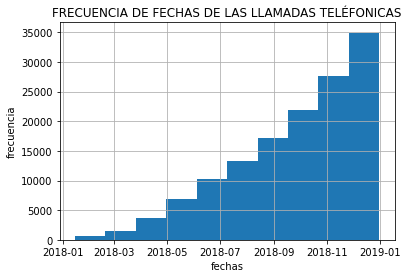

In [784]:
#realizamos el cambio de tipo de dato de la columna 'call_date' en el DataFrame 'llamadas'
llamadas['call_date']= pd.to_datetime(llamadas['call_date'], format='%Y-%m-%d')
llamadas['call_date'].hist()
plt.title('FRECUENCIA DE FECHAS DE LAS LLAMADAS TELÉFONICAS')
plt.xlabel('fechas')
plt.ylabel('frecuencia')
plt.show()

Se aprecian valores problemáticos que tienen una duración de cero, revisaremos si existen duplicados

In [785]:
#verificando la existencia de valores duplicados
llamadas.duplicated().sum()

0

Tenemos llamadas que tienen una duración de cero. Es un valor problemático si tenemos encuenta que probablemente no entran en el cobro de ningún plan. Calculemos que porcentaje de datos representan del total para esta columna.

In [786]:
#calculamos la cantidad de llamdas con duración cero
cantidad_llamadas_cero = llamadas['duration'].loc[llamadas['duration']==0].count()
print('NÚMERO DE LLAMADAS CON DURACIÓN CERO:          ', cantidad_llamadas_cero)
#calculamos la cantidad de datos en la columna 'duration'
cantidad_llamadas= len(llamadas['duration'])
print('NÚMERO DE LLAMADAS REGISTRADAS EN TOTAL:      ', cantidad_llamadas)
#calculamos el porcentaje que representan los datos con valor cero 
porcentaje_llamadas_cero = cantidad_llamadas_cero / cantidad_llamadas
print('PORCENTAJE DE LLAMADAS CON CERO DE DURACIÓN: ',  "{: .2%}".format(porcentaje_llamadas_cero))

NÚMERO DE LLAMADAS CON DURACIÓN CERO:           26834
NÚMERO DE LLAMADAS REGISTRADAS EN TOTAL:       137735
PORCENTAJE DE LLAMADAS CON CERO DE DURACIÓN:   19.48%


Es un porcentaje considerable de los datos no es conveniente, eliminarlos. Vamos a estudiar cual es su origen. Pueden ser el resultado de marcar erroneamente un número telefónico. Para este caso podemos observar si es que el usuario nos es repetitivo significativamente en el marcaje de un mismo número teléfonico.

In [787]:
#Filtro de las llamadas que se encuentran con valor cero en su duración
llamadas_cero = llamadas.loc[llamadas['duration']==0]
llamadas_cero

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


Vamos a segmentar la información por el identificador de usario y analizar la perspectiva que nos muestran los datos.

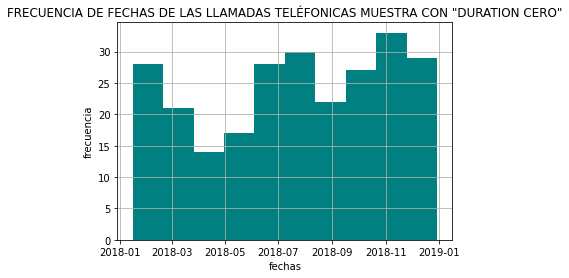

In [788]:
#calculamos un objeto tipo Series para poder encontrar la moda 
#en la columna de user_id
maximo = llamadas_cero["user_id"].value_counts() > 100
#con maximo.index[0] tenemos la moda, con este estadístico podemos buscar un comportamiento
#significativo desde la frecuencia de llamadas conformen a el periodo 2018-01 al 2019-01
no_maximo = llamadas_cero[llamadas_cero["user_id"] == maximo.index[0]]
no_maximo["call_date"].hist(color = 'teal')
plt.title('FRECUENCIA DE FECHAS DE LAS LLAMADAS TELÉFONICAS MUESTRA CON "DURATION CERO"')
plt.xlabel('fechas')
plt.ylabel('frecuencia')
plt.show()

Vamos a observar como se comporta los el estadistíco, con el número de llamadas restantes.

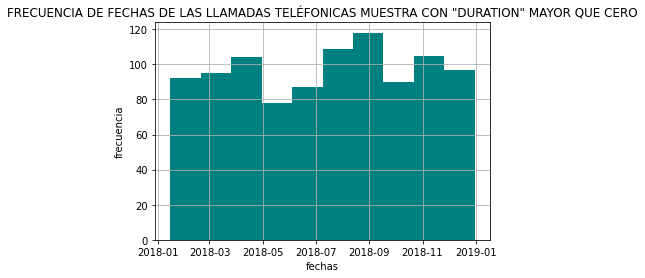

In [789]:
no_maximot = llamadas[(llamadas["user_id"] == maximo.index[0]) & (llamadas['duration']!=0)]
no_maximot["call_date"].hist(color = 'teal')
plt.title('FRECUENCIA DE FECHAS DE LAS LLAMADAS TELÉFONICAS MUESTRA CON "DURATION" MAYOR QUE CERO')
plt.xlabel('fechas')
plt.ylabel('frecuencia')
plt.show()

Vemos una estructura similar en el histograma 3 montes y 2 valles, podemos tener cierta certeza de que los datos conservan la estructura del resto del DataFrame. No tenemos evidencia de que sean valores atípicos. 


In [790]:
llamadas['mes_año'] = pd.DatetimeIndex(llamadas['call_date']).month
#Diccionarios de días y meses
meses = {
    1: "Enero",
    2: "Febrero",
    3: "Marzo",
    4: "Abril",
    5: "Mayo",
    6: "Junio",
    7: "Julio",
    8: "Agosto",
    9: "Septiembre",
    10: "Octubre",
    11: "Noviembre",
    12: "Diciembre",
}

llamadas['mes'] = llamadas['mes_año'].map(meses)

In [791]:
#Creamos un frame auxiliar para observar el comportamiento de el número de
#de fechas en call_date 
data1 = pd.DataFrame()
data1['llamadas'] = llamadas['mes_año'].value_counts()
data1['mes'] = llamadas['mes_año'].value_counts().index.map(meses)
data1

,llamadas,mes
12,30614,Diciembre
11,24651,Noviembre
10,21064,Octubre
9,16523,Septiembre
8,13590,Agosto
7,11105,Julio
6,8221,Junio
5,5959,Mayo
4,3442,Abril
3,1620,Marzo


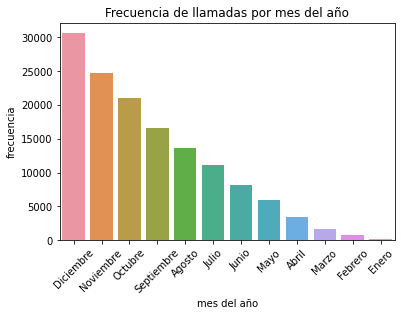

In [792]:
#usando los valores de la tabla construimos un diagrama de barras
frecuencia=data1['llamadas']
variable = data1['mes']
sns.barplot(x=variable, y=frecuencia)
plt.title('Frecuencia de llamadas por mes del año')
plt.xlabel('mes del año')
plt.ylabel('frecuencia')
plt.xticks(rotation=45)
plt.show()

Podemos observar como el número de llamadas se incrementa a lo largo del fin de cada año. Se debe observar una tendencia similiar con los datos cuya duración de llamada es cero. Por el supuesto que a mayor número de llamadas mayor el error en la marcación.

In [793]:
# Refrescando el Filtro de las llamadas que se encuentran con valor cero en su duración
llamadas_cero = llamadas.loc[llamadas['duration']==0]
#Procedemos a trazar las fechas vs el número de llamadas para este filtro
#Creamos un frame auxiliar para observar el comportamiento de el número de
#de fechas en call_date 
data2 = pd.DataFrame()
data2['llamadas'] = llamadas_cero['mes_año'].value_counts()
data2['mes'] = llamadas['mes_año'].value_counts().index.map(meses)
data2

,llamadas,mes
12,5948,Diciembre
11,4782,Noviembre
10,4143,Octubre
9,3245,Septiembre
8,2702,Agosto
7,2136,Julio
6,1565,Junio
5,1182,Mayo
4,637,Abril
3,310,Marzo


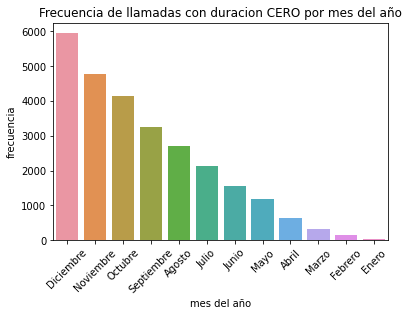

In [794]:
#usando los valores de la tabla construimos un diagrama de barras
frecuencia=data2['llamadas']
variable = data2['mes']
sns.barplot(x=variable, y=frecuencia)
plt.title('Frecuencia de llamadas con duracion CERO por mes del año')
plt.xlabel('mes del año')
plt.ylabel('frecuencia')
plt.xticks(rotation=45)
plt.show()

La gráfica indica que existe una tendencia aumentar el número de llamadas con duración cero. A lo largo del la fecha en que se hicieron. Y se mantiene la tendencia al filtrar las llamadas con duración cero.

Si estamos midiendo que plan de venta de datos es más conveniente para un usuario, es claro que se inclinará por aquel plan que no lo penalice si se equivoca al hacer una llamada. El patrón que tenemos revela una consitencia con el marcaje y el uso de la llamada en la duración. Tomando esta reflexión indicaremos que estas llamadas pueden ser tomadas en cuenta en el estudio aunque con cierta restricción, pués hay que analizar el tipo de tratamiento que hace la compañia en tipo de llamadas con duración cero.

 Para cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. De acuerdo con esto estas llamadas se considerán que no entran en el plan de cobro. Lo que beneficia al usuario. El enfoque que se le debe dar a estos datos es ver si el usuario mantiene una tendencia que indique alguna preferencia para el caso de que tenemos que este tipo de clientes hacen uso de una robustes de marcajes por lo que entenderemos, que son personas relacionadas con operaciones de enlace ó de mercadotecnia en empresas.

Observemos los cuartiles en forma gráfica para visualizar los valores que son atípicos en la variable 'duration'.

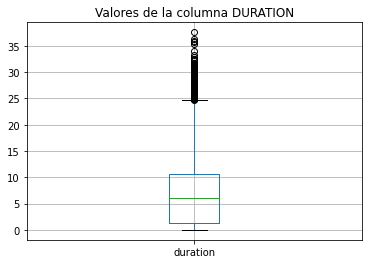

In [795]:
# Mediante un grafico tipo boxplot tenemos la visualización de los quartiles en la 
#variable para este dataframe de llamanadas.
llamadas.boxplot('duration')
plt.title('Valores de la columna DURATION')
plt.show()

In [796]:
#definimos una función para calcular quartiles
def calcula_quartiles(columna, tabla):
    Q1 = tabla[columna].quantile(0.25)
    Q3 = tabla[columna].quantile(0.75)
    IQR = Q3 - Q1
    print("PRIMER QUARTILE:  ", Q1)
    print("TERCER QUARTILE:  ", Q3)
    print("RANGO INTERCUÁTIL:", IQR)
    lim_max = Q3 + 1.5*IQR
    lim_min = Q1 - 1.5*IQR
    print("LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE ", columna, ": ", lim_max)
    print("LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE ", columna, ": ", lim_min)
    return [lim_min, lim_max]

In [797]:
[lim_min_llam_duration , lim_max_llam_duration] = calcula_quartiles('duration', llamadas)

PRIMER QUARTILE:   1.29
TERCER QUARTILE:   10.69
RANGO INTERCUÁTIL: 9.399999999999999
LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE  duration :  24.79
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE  duration :  -12.809999999999999


Corregimos el límite inferior debido a que sabemos que no hay valores negativos realistas para la variable 'duration'.

In [798]:
#definimos los límites para los valores típicos en la variable duration para el dataframe llamadas
lim_min_llam_duration = 0
print("LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE duration: ", lim_max_llam_duration)
print("LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE duration: ", lim_min_llam_duration)

LIMITE DEL SUPERIOR PARA VALORES TIPICOS DE LA VARIABLE duration:  24.79
LIMITE DEL INFERIOR PARA VALORES TIPICOS DE LA VARIABLE duration:  0


<a id='missing_values'></a>
### Datos del dataframe internet.

Para el DataFrame **internet** Se procede a realizar el cambio de tipo de datos de la variable **session_date**.

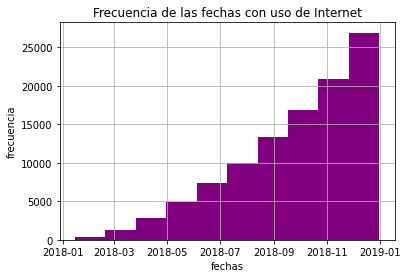

In [799]:
#cambio de tipo de datos de la variable para que se maneje como fecha
internet['session_date'] = pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')
internet['session_date'].hist(color = 'purple')
plt.title('Frecuencia de las fechas con uso de Internet')
plt.xlabel('fechas')
plt.ylabel('frecuencia')
plt.show()

In [800]:
#Comprovemos si hay valores duplicados
internet.duplicated().sum()

0

No tenemos valores duplicados para el dataframe de **internet**.

<a id='duplicates'></a>
### Datos del dataframe mensajes.

En este dataframe procedemos a cambiar al tipo de datos correcto la columna **message_date**.

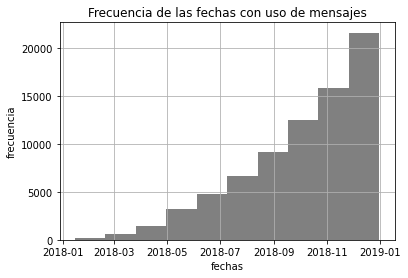

In [801]:
#cambio de tipo de datos de la variable para que se maneje como fecha
mensajes['message_date'] = pd.to_datetime(mensajes['message_date'], format= '%Y-%m-%d')
mensajes['message_date'].hist(color = 'Gray')
plt.title('Frecuencia de las fechas con uso de mensajes')
plt.xlabel('fechas')
plt.ylabel('frecuencia')
plt.show()

In [802]:
#Comprovemos si hay valores duplicados
mensajes.duplicated().sum()

0

<a id='data_preprocessing_conclusions'></a>
### Datos del dataframe planes.

In [803]:
#Observemos que datos continene cada una de las tabla 'planes'
planes.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<a id='data_preprocessing_usuario'></a>
### Datos del dataframe usuarios.

En este dataframe procedemos a cambiar al tipo de datos correcto la columna **reg_date** y **churn_date**.

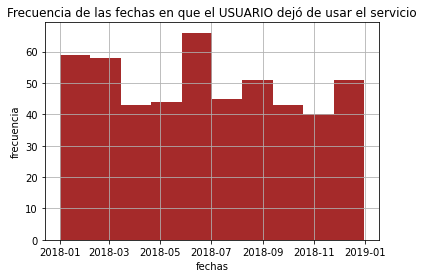

In [804]:
#Convirtiendo al tipo de datos correctos las variables almacenan información
#tipo fechas
usuarios['reg_date'] = pd.to_datetime(usuarios['reg_date'], format= '%Y-%m-%d')
usuarios['churn_date'] = pd.to_datetime(usuarios['churn_date'], format= '%Y-%m-%d')
usuarios['reg_date'].hist(color='brown')
plt.title('Frecuencia de las fechas en que el USUARIO dejó de usar el servicio')
plt.xlabel('fechas')
plt.ylabel('frecuencia')
plt.show()

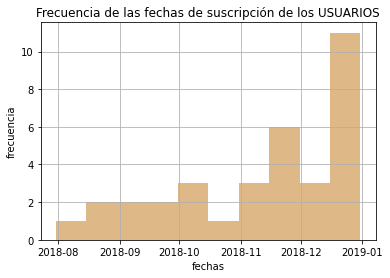

In [805]:
#revisando valores de la columan 'churn_date'
usuarios['churn_date'].hist(color='burlywood')
plt.title('Frecuencia de las fechas de suscripción de los USUARIOS')
plt.xlabel('fechas')
plt.ylabel('frecuencia')
plt.show()

Para cada usuario, vamos a buscar:
* El número de llamadas realizadas y minutos utilizados al mes
* La cantidad de los SMS enviados por mes.
* El volumen de datos por mes.
* Los ingresos mensuales de cada usuario.

<a id='data_preprocessing_usuario1'></a>
### El número de llamadas realizadas y minutos utilizados al mes.

In [806]:
#Megaline redondea llamadas, cada llamada individual se redondea
llamadas['duration'] = llamadas['duration'].apply(np.ceil)  
llamadas

,id,user_id,call_date,duration,mes_año,mes
0,1000_93,1000,2018-12-27,9.0,12,Diciembre
1,1000_145,1000,2018-12-27,14.0,12,Diciembre
2,1000_247,1000,2018-12-27,15.0,12,Diciembre
3,1000_309,1000,2018-12-28,6.0,12,Diciembre
4,1000_380,1000,2018-12-30,5.0,12,Diciembre
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,11,Noviembre
137731,1499_200,1499,2018-10-20,11.0,10,Octubre
137732,1499_201,1499,2018-09-21,9.0,9,Septiembre
137733,1499_202,1499,2018-10-10,1.0,10,Octubre


In [807]:
#realizamos una tabla dinámica para calcular el número de minutos usados  por cada usuario al mes
analisis_usu2 = llamadas.pivot_table(index = ['user_id', 'mes'], values = 'duration', aggfunc = 'sum' )
analisis_usu2

duration
user_id mes                 
1000    Diciembre      124.0
1001    Agosto         182.0
        Diciembre      412.0
        Noviembre      426.0
        Octubre        393.0
...                      ...
1498    Septiembre     363.0
1499    Diciembre      496.0
        Noviembre      308.0
        Octubre        385.0
        Septiembre     346.0

[2258 rows x 1 columns]

In [808]:
#realizamos una tabla dinámica para calcular el número de llamadas hechas por cada usuario por mes
analisis_usu1 = llamadas.pivot_table(index = ['user_id', 'mes'],  values = 'id',  aggfunc = 'count')
analisis_usu1

id
user_id mes           
1000    Diciembre   16
1001    Agosto      27
        Diciembre   56
        Noviembre   64
        Octubre     65
...                 ..
1498    Septiembre  45
1499    Diciembre   65
        Noviembre   45
        Octubre     53
        Septiembre  41

[2258 rows x 1 columns]

In [809]:
#El número de llamadas realizadas y minutos utilizados al mes
analisis_usu3 = analisis_usu2.join(analisis_usu1, on=['user_id', 'mes'])
analisis_usu3 = analisis_usu3.rename(columns = {"id":"llamadas"})
analisis_usu3

duration  llamadas
user_id mes                           
1000    Diciembre      124.0        16
1001    Agosto         182.0        27
        Diciembre      412.0        56
        Noviembre      426.0        64
        Octubre        393.0        65
...                      ...       ...
1498    Septiembre     363.0        45
1499    Diciembre      496.0        65
        Noviembre      308.0        45
        Octubre        385.0        53
        Septiembre     346.0        41

[2258 rows x 2 columns]

Tenemos en la tabla de arriba el por usuario el número de llamadas por usuario al mes y la cantidad de minutos usuados en esa llamadas por cada usuario al mes. Procedamos a configurar otra tabla donde podamos observar la cantidad de mensajes por usuario durante cada mes.

<a id='data_preprocessing_usuario2'></a>
### La cantidad de los SMS enviados por mes.

Vamos a necesitar caracterizar la columna de la tabla de denominadad 'mensajes', para esto es necesario conformar una nueva columna llamada mes.

In [810]:
#categorizamos la fecha de la tabla mensajes por medio de la columna nueva de mes
mensajes['mes'] = pd.DatetimeIndex(mensajes['message_date']).month
#utilizamos el diccionario meses para poner a 1 para 'enero', 2 para 'febrero'....
mensajes['mes'] = mensajes['mes'].map(meses)
#realizamos una tabla dinámica para poder resumir la cantidad de mensajes por cada usuari al mes
analisis_usu4 = mensajes.pivot_table(index = ['user_id', 'mes'],  values = 'id',  aggfunc = 'count')
analisis_usu4 = analisis_usu4.rename(columns = {"id":"mensajes"})
analisis_usu4

mensajes
user_id mes                 
1000    Diciembre         11
1001    Agosto            30
        Diciembre         44
        Noviembre         36
        Octubre           53
...                      ...
1496    Diciembre         11
        Noviembre         13
        Octubre           18
        Septiembre        21
1497    Diciembre         50

[1806 rows x 1 columns]

<a id='data_preprocessing_usuario3'></a>
### El volumen de datos por mes.

De la misma forma que en el inciso anterior, tenemos que caracterizar las fechas de la tabla 'ddd' por mes. Para posteriormente realizar una tabla dinámica que sume el número de volumen de datos por mes para cada usuario.

In [811]:
#vamos a crear la columna de mes en la tabla internet
internet['mes'] =  pd.DatetimeIndex(internet['session_date']).month
#vamos a cambiar en la columna mes por medio del diccionario y tengamos 
#'enero' si es 1 , 'febrero' si es 2....
internet['mes'] =  internet['mes'].map(meses)
#realizamos una tabla dinámica para poder resumir la cantidad de mensajes por cada usuari al mes
analisis_usu5 = internet.pivot_table(index = ['user_id', 'mes'],  values = 'mb_used',  aggfunc = 'sum')
analisis_usu5= analisis_usu5.rename(columns = {"mb_used":"volumen_datos"})
analisis_usu5

volumen_datos
user_id mes                      
1000    Diciembre         1901.47
1001    Agosto            6919.15
        Diciembre        19369.18
        Noviembre        18504.30
        Octubre          22330.49
...                           ...
1498    Septiembre       22827.28
1499    Diciembre        22059.21
        Noviembre        16813.83
        Octubre          19492.43
        Septiembre       12984.76

[2277 rows x 1 columns]

<a id='data_preprocessing_usuario4'></a>
### Los ingresos mensuales por cada usuario. 
Restaremos el límite del paquete gratuito del número total de llamadas, SMS y datos; multiplicando el resultado por el valor de tarifa de llamadas; agregando posteriormente el cargo mensual según la tarifa de llamadas. 
Para restar el límite del paquete gratuito del número total de llamdas, SMS, y datos; primero debemos identificar en que plan de datos se encuentra cada usuario, devido a que en dependiendo del plan será el calculo de ingreso adicional, porque justamente cada plan tiene un limite distinto de uso de de llamadas, SMS y datos.En la tabla usuario con la variable plan — nombre de la tarifa de cada usuario- podemos identificarlo. Ahora lo siguiente es poder usar una de las tablas dinámicas para realizar la diferencia.

In [812]:
#Restaremos el límite del paquete gratuito del número total de llamadas, SMS y datos
#mostraremos el plan para cada usuario
planes_sus = usuarios[['user_id', 'plan']]
planes_sus.sort_values(by='user_id', ascending=True)
planes_sus

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
...,...,...
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf


Ahora vamos a identificar en una tabla mediante las claves de la columna **user_id**, en las tablas de llamadas, mensajes e internet.

In [813]:
#aislemos para cada usuario el número total de llamadas, SMS y datos
#para esto usemos la tabla dinámica analisi_usu4, implementada anteriormente junto con la tabla 
#dinámica analisis_usu3 para tener en una sola tabla la información para cada usuario
#del número de llamadas, mensajes,  y SMS  .
analisis_usu_t1 = analisis_usu3.join(analisis_usu4, on=['user_id', 'mes'])
analisis_usu_t1

duration  llamadas  mensajes
user_id mes                                     
1000    Diciembre      124.0        16      11.0
1001    Agosto         182.0        27      30.0
        Diciembre      412.0        56      44.0
        Noviembre      426.0        64      36.0
        Octubre        393.0        65      53.0
...                      ...       ...       ...
1498    Septiembre     363.0        45       NaN
1499    Diciembre      496.0        65       NaN
        Noviembre      308.0        45       NaN
        Octubre        385.0        53       NaN
        Septiembre     346.0        41       NaN

[2258 rows x 3 columns]

In [814]:
#ahora pasemos para cada usuario el volumen de datos de cada usuario por mes
analisis_usu_t2 = analisis_usu5.join(analisis_usu_t1, on=['user_id', 'mes'])
analisis_usu_t2

volumen_datos  duration  llamadas  mensajes
user_id mes                                                    
1000    Diciembre         1901.47     124.0      16.0      11.0
1001    Agosto            6919.15     182.0      27.0      30.0
        Diciembre        19369.18     412.0      56.0      44.0
        Noviembre        18504.30     426.0      64.0      36.0
        Octubre          22330.49     393.0      65.0      53.0
...                           ...       ...       ...       ...
1498    Septiembre       22827.28     363.0      45.0       NaN
1499    Diciembre        22059.21     496.0      65.0       NaN
        Noviembre        16813.83     308.0      45.0       NaN
        Octubre          19492.43     385.0      53.0       NaN
        Septiembre       12984.76     346.0      41.0       NaN

[2277 rows x 4 columns]

In [815]:
# para agregar la información del tipo de plan para cada usuario
#es necesario resetear el indice actual de la tabal analisis_usu_t2 
dataframe1 = analisis_usu_t2.reset_index()
dataframe1

,user_id,mes,volumen_datos,duration,llamadas,mensajes
0,1000,Diciembre,1901.47,124.0,16.0,11.0
1,1001,Agosto,6919.15,182.0,27.0,30.0
2,1001,Diciembre,19369.18,412.0,56.0,44.0
3,1001,Noviembre,18504.30,426.0,64.0,36.0
4,1001,Octubre,22330.49,393.0,65.0,53.0
...,...,...,...,...,...,...
2272,1498,Septiembre,22827.28,363.0,45.0,NaN
2273,1499,Diciembre,22059.21,496.0,65.0,NaN
2274,1499,Noviembre,16813.83,308.0,45.0,NaN
2275,1499,Octubre,19492.43,385.0,53.0,NaN


In [816]:
#Realizamos la inserción de los planes de cada usuario en 
#una nueva tabla
analisis_usu_t3 = planes_sus.merge(right=dataframe1, on='user_id', how='right')
h1 = analisis_usu_t3.copy()
analisis_usu_t3

,user_id,plan,mes,volumen_datos,duration,llamadas,mensajes
0,1000,ultimate,Diciembre,1901.47,124.0,16.0,11.0
1,1001,surf,Agosto,6919.15,182.0,27.0,30.0
2,1001,surf,Diciembre,19369.18,412.0,56.0,44.0
3,1001,surf,Noviembre,18504.30,426.0,64.0,36.0
4,1001,surf,Octubre,22330.49,393.0,65.0,53.0
...,...,...,...,...,...,...,...
2272,1498,surf,Septiembre,22827.28,363.0,45.0,NaN
2273,1499,surf,Diciembre,22059.21,496.0,65.0,NaN
2274,1499,surf,Noviembre,16813.83,308.0,45.0,NaN
2275,1499,surf,Octubre,19492.43,385.0,53.0,NaN


In [817]:
#ahora conformamos el nuevo indice incluyendo la columna nueva de plan
analisis_usu_t3 = analisis_usu_t3.set_index(['user_id', 'plan', 'mes'])
analisis_usu_t3

volumen_datos  duration  llamadas  mensajes
user_id plan     mes                                                    
1000    ultimate Diciembre         1901.47     124.0      16.0      11.0
1001    surf     Agosto            6919.15     182.0      27.0      30.0
                 Diciembre        19369.18     412.0      56.0      44.0
                 Noviembre        18504.30     426.0      64.0      36.0
                 Octubre          22330.49     393.0      65.0      53.0
...                                    ...       ...       ...       ...
1498    surf     Septiembre       22827.28     363.0      45.0       NaN
1499    surf     Diciembre        22059.21     496.0      65.0       NaN
                 Noviembre        16813.83     308.0      45.0       NaN
                 Octubre          19492.43     385.0      53.0       NaN
                 Septiembre       12984.76     346.0      41.0       NaN

[2277 rows x 4 columns]

Ahora tenemos identificado en una tabla  número total de llamadas, mensajes y datos. Podemos proceder a restar el límite gratuito de cada plan.

In [818]:
#dividimos la tabla anterior en los dos dataframes uno con los planes surf y otro 
#con los planes ultimante
plan_surf = analisis_usu_t3.xs('surf', level='plan').copy()
plan_ultimate = analisis_usu_t3.xs('ultimate', level='plan').copy()

plan_surf.fillna(0, inplace=True)
plan_ultimate.fillna(0, inplace=True)

#creamos la columna 'diferencia_plan', para almacenar la resta del límite del paquete gratuito frente 
#al número total de llamadas

#para el plan surf 500 minutos al mes, 50 SMS y 15 GB de datos
plan_surf['dif_plan_SMS'] = plan_surf['mensajes'] - 50 
# primero hay que convertir megabytes a gigabytes 
plan_surf['dif_plan_GB'] = plan_surf['volumen_datos']/1024
plan_surf['dif_plan_GB'] = plan_surf['dif_plan_GB'] - 15  
plan_surf['dif_plan_mins'] = plan_surf['duration'] - 500 


#para el plan ultimate 3000 minutos al mes, 1000 SMS y 30 GB de datos
plan_ultimate['dif_plan_SMS'] = plan_ultimate['mensajes'] - 1000 
# primero hay que convertir megabytes a gigabytes 
plan_ultimate['dif_plan_GB'] = plan_ultimate['volumen_datos'] / 1024
plan_ultimate['dif_plan_GB'] = plan_ultimate['dif_plan_GB'] - 30  
plan_ultimate['dif_plan_mins'] = plan_ultimate['duration'] - 3000 

Visualizando por separado la información conforme a un DataFrame para cada plan 

In [819]:
#imprimimos los datos hayados para el plan surf
print('DATAFRAME PARA LOS DATOS DEL PLAN SURF')
print()
#si la diferencia de los consumos es negativo significa que no hay saldo adicional
#para cobrar en el plan tarifario del cliente por lo que se inicializan estas columnas
#a cero
plan_surf.loc[plan_surf['dif_plan_SMS'] < 0, 'dif_plan_SMS'] = 0
plan_surf.loc[plan_surf['dif_plan_GB'] < 0, 'dif_plan_GB'] = 0
plan_surf.loc[plan_surf['dif_plan_mins'] < 0, 'dif_plan_mins'] = 0


DATAFRAME PARA LOS DATOS DEL PLAN SURF



In [820]:
#imprimimos los datos hayados para el plan surf
print('DATAFRAME PARA LOS DATOS DEL PLAN ULTIMATE')
print()
#si la diferencia de los consumos es negativo significa que no hay saldo adicional
#para cobrar en el plan tarifario del cliente por lo que se inicializan estas columnas
#a cero
plan_ultimate.loc[plan_ultimate['dif_plan_SMS'] < 0, 'dif_plan_SMS'] = 0
plan_ultimate.loc[plan_ultimate['dif_plan_GB'] < 0, 'dif_plan_GB'] = 0
plan_ultimate.loc[plan_ultimate['dif_plan_mins'] < 0, 'dif_plan_mins'] = 0
plan_ultimate

DATAFRAME PARA LOS DATOS DEL PLAN ULTIMATE



volumen_datos  duration  llamadas  mensajes  dif_plan_SMS  \
user_id mes                                                                     
1000    Diciembre         1901.47     124.0      16.0      11.0           0.0   
1006    Diciembre        32118.82      59.0       9.0     139.0           0.0   
        Noviembre         2068.37      10.0       2.0      15.0           0.0   
1008    Diciembre        14689.33     634.0      85.0      26.0           0.0   
        Noviembre        23676.72     446.0      63.0      37.0           0.0   
...                           ...       ...       ...       ...           ...   
1493    Diciembre        15289.09     473.0      65.0       0.0           0.0   
        Noviembre        15630.78     500.0      73.0       0.0           0.0   
        Octubre          16329.57     450.0      66.0       0.0           0.0   
        Septiembre       14991.17     529.0      66.0       0.0           0.0   
1497    Diciembre        11106.55     300.0      54.0      50.0           0.0   

                    dif_plan_GB  dif_plan_mins  
user_id mes                                     
1000    Diciembre      0.000000            0.0  
1006    Diciembre      1.366035            0.0  
        Noviembre      0.000000            0.0  
1008    Diciembre      0.000000            0.0  
        Noviembre      0.000000            0.0  
...                         ...            ...  
1493    Diciembre      0.000000            0.0  
        Noviembre      0.000000            0.0  
        Octubre        0.000000            0.0  
        Septiembre     0.000000            0.0  
1497    Diciembre      0.000000            0.0  

[719 rows x 7 columns]

In [821]:
#Megaline redondea los segundos a minutos
plan_ultimate['dif_plan_mins'] = plan_ultimate['dif_plan_mins'].apply(np.ceil)  
plan_surf['dif_plan_mins'] = plan_surf['dif_plan_mins'].apply(np.ceil)

In [822]:
#definimos la variable que almacenará el cargo de cada usuario por mes
plan_ultimate['cargo_mes'] = 0
plan_surf['cargo_mes'] = 0
# si la diferencia de lo 
#definamos una función que calcule el cargo mensual
def cargo_mensual(renglon, tipo_plan):
    cargomes = 0
#focaliza el tipo de plan en el dataframe planes    
    planes.loc[planes['plan_name'] == tipo_plan]
#Pago mensual:            
    cargomes = planes['mb_per_month_included']        
# Si se exceden los límites del paquete : #1 minuto: #1 SMS: #1 GB de datos:    
    if renglon['dif_plan_SMS'] > 0:
        cargomes = renglon['dif_plan_SMS'] * planes['usd_per_message'] + cargomes

    if renglon['dif_plan_GB'] > 0:
        cargomes = renglon['dif_plan_GB'] * planes['usd_per_gb'] + cargomes

    if renglon['dif_plan_mins'] > 0:
        cargomes = renglon['dif_plan_mins'] * planes['usd_per_minute'] + cargomes
    return cargomes
#para el dataframe con la información del plan ultimate
plan_ultimate['cargo_mes'] = plan_ultimate.agg(func=cargo_mensual, axis=1, tipo_plan = 'ultimate')
plan_surf['cargo_mes'] = plan_surf.agg(func=cargo_mensual, axis=1, tipo_plan = 'surf')

Relizaremos el cálculo del cargo mensual, pero fué necesario separar la información en dos dataframes: uno para los usuarios que se encuentran inscritos en el plan de datos SURF y otro dataframe para los usuarios que se encuentran inscritos en el plan de datos ULTIMATE.

In [823]:
#Visualizando los cargos por mes para el plan de datos ULTIMANTE 
plan_ultimate[['dif_plan_SMS', 'dif_plan_GB', 'dif_plan_mins', 'cargo_mes']]

dif_plan_SMS  dif_plan_GB  dif_plan_mins     cargo_mes
user_id mes                                                               
1000    Diciembre            0.0     0.000000            0.0  15360.000000
1006    Diciembre            0.0     1.366035            0.0  15373.660352
        Noviembre            0.0     0.000000            0.0  15360.000000
1008    Diciembre            0.0     0.000000            0.0  15360.000000
        Noviembre            0.0     0.000000            0.0  15360.000000
...                          ...          ...            ...           ...
1493    Diciembre            0.0     0.000000            0.0  15360.000000
        Noviembre            0.0     0.000000            0.0  15360.000000
        Octubre              0.0     0.000000            0.0  15360.000000
        Septiembre           0.0     0.000000            0.0  15360.000000
1497    Diciembre            0.0     0.000000            0.0  15360.000000

[719 rows x 4 columns]

In [824]:
#Visualizando los cargos por mes para el plan de datos SURF 
plan_surf[['dif_plan_SMS', 'dif_plan_GB', 'dif_plan_mins', 'cargo_mes']]

dif_plan_SMS  dif_plan_GB  dif_plan_mins     cargo_mes
user_id mes                                                               
1001    Agosto               0.0     0.000000            0.0  15360.000000
        Diciembre            0.0     3.915215            0.0  15399.152148
        Noviembre            0.0     3.070605            0.0  15390.706055
        Octubre              3.0     6.807119            0.0  15428.161191
        Septiembre           0.0     0.000000            0.0  15360.000000
...                          ...          ...            ...           ...
1498    Septiembre           0.0     7.292266            0.0  15432.922656
1499    Diciembre            0.0     6.542197            0.0  15425.421973
        Noviembre            0.0     1.419756            0.0  15374.197559
        Octubre              0.0     4.035576            0.0  15400.355762
        Septiembre           0.0     0.000000            0.0  15360.000000

[1558 rows x 4 columns]

<a id='EDA'></a>
## /er. Etapa 3. Análisis Exploratorio de Datos (EDA) 

Describamos el comportamiento de los clientes.Por medio de los minutos, SMS y volumen de datos que requieren los usuarios de cada tarifa por mes; calculemos la media, la varianza y la desviación estándar. Con la información anterior trazaremos los histogramas correspondientes. Describeremos las distribuciones correspondientes.

Finalmente analizaremos toda la información recopilada para observar que plan es el que de conformidad con el comportamiento de los clientes provoca qué tarifa de prepago genere más ingresos para la compañía.

<a id='EDA31'></a>
###  Comportamiento  de los clientes en la muestra.

Para buscar que comportamiento presentan los clientes en la muestra, es necesario meditar acerca de que el plan que más a vendido, el plan que más ingreso reacauda a la compañia en el año, en el mes. Segmentar el conjunto de usuarios para los que más datos usan, los que más llamadas hacen, los que prefieren enviar mensajes.

In [825]:
#por medio de los datos de los dataframe para los planes 'SURF' y 'ULTIMATE'
#veamos el número de usuarios de cada uno.
num_surf =usuarios.loc[usuarios['plan'] == 'surf', 'plan'].count()
num_ultimante = usuarios.loc[usuarios['plan'] == 'ultimate', 'plan'].count()
#presentamos los resultados para los valores guardados en las variables
print('NÚMERO DE USUARIOS QUE SE ENCUENTRAN INSCRITOS EN EL PLAN "SURF":     ',num_surf )
print('NÚMERO DE USUARIOS QUE SE ENCUENTRAN INSCRITOS EN EL PLAN "ULTIMATE": ',num_ultimante )
print('PORCENTAJE DE USUARIOS CON EL PLAN SURF VS. PLAN ULTIMANTE:          ', "{: .2%}".format(num_surf/num_ultimante) )

NÚMERO DE USUARIOS QUE SE ENCUENTRAN INSCRITOS EN EL PLAN "SURF":      339
NÚMERO DE USUARIOS QUE SE ENCUENTRAN INSCRITOS EN EL PLAN "ULTIMATE":  161
PORCENTAJE DE USUARIOS CON EL PLAN SURF VS. PLAN ULTIMANTE:            210.56%


In [826]:
#Vamos a identificar los ingresos generados por los 2 planes
print('INGRESOS EN EL PERIODO COMPRENDIDO DE UN AÑO PARA EL PLAN SURF:      ', "${:0,.2f}".format(plan_surf['cargo_mes'].sum()))
print('INGRESOS EN EL PERIODO COMPRENDIDO DE UN AÑO PARA EL PLAN ULTIMANTE: ', "${:0,.2f}".format(plan_ultimate['cargo_mes'].sum()))

INGRESOS EN EL PERIODO COMPRENDIDO DE UN AÑO PARA EL PLAN SURF:       $23,990,100.30
INGRESOS EN EL PERIODO COMPRENDIDO DE UN AÑO PARA EL PLAN ULTIMANTE:  $11,046,016.54


Ahora hagamos la razón entre el los ingresos totales y el número de usuarios en cada plan. Este indicador nos permitira entender lo que cada usuario en promedio genera al año por cada plan.

In [827]:
#Identificación entre los ingresos totales y el número de usuarios en cada plan
print('CANTIDAD DE INGRESOS POR NÚMERO DE USUARIOS EN EL PLAN SURF:      ', "${:0,.2f}".format(plan_surf['cargo_mes'].sum()/num_surf))
print('CANTIDAD DE INGRESOS POR NÚMERO DE USUARIOS EN EL PLAN ULTIMANTE: ', "${:0,.2f}".format(plan_ultimate['cargo_mes'].sum()/num_ultimante))

CANTIDAD DE INGRESOS POR NÚMERO DE USUARIOS EN EL PLAN SURF:       $70,767.26
CANTIDAD DE INGRESOS POR NÚMERO DE USUARIOS EN EL PLAN ULTIMANTE:  $68,608.80


Los ingresos por mes para cada plan nos puede dar una idea de las oportunidades, para mejorar la oferta de la compañia.

In [828]:
#Creamos una tabla dinámica para obtener la információn de lo facturado por mes para 
#el plan ULTIMATE
print('PLAN ULTIMATE FACTURADO POR MESES')
meses_ultimate = plan_ultimate.pivot_table(index='mes', values ='cargo_mes', aggfunc='sum')
meses_ultimate

PLAN ULTIMATE FACTURADO POR MESES


,cargo_mes
mes,
Abril,3.226431e+05
Agosto,1.090832e+06
Diciembre,2.320017e+06
Enero,6.144000e+04
Febrero,1.075200e+05
Julio,9.063960e+05
Junio,7.220192e+05
Marzo,1.843782e+05
Mayo,4.454614e+05


In [829]:
#Creamos una tabla dinámica para obtener la információn de lo facturado por mes para 
#el plan SURF
print('PLAN SURF FACTURADO POR MESES')
meses_surf = plan_surf.pivot_table(index='mes', values ='cargo_mes', aggfunc='sum')
meses_surf

PLAN SURF FACTURADO POR MESES


,cargo_mes
mes,
Abril,7.535917e+05
Agosto,2.448878e+06
Diciembre,4.883999e+06
Enero,3.072000e+04
Febrero,1.383583e+05
Julio,1.847991e+06
Junio,1.461743e+06
Marzo,3.538258e+05
Mayo,1.169342e+06


Hagamos una gráfica comparativa para poder observar el comportamiento entre los dos planes. Usando la información de las 2 tablas dinámicas, para tal efecto, pasamos a realizar una función de ambas tablas y sobre esta tabla realizamos la gráfica comparativa.

In [830]:
#implantamos las dos tablas en una, para unificar la información
meses_plan = meses_ultimate.merge(right=meses_surf, on='mes', how='right')
meses_plan

,cargo_mes_x,cargo_mes_y
mes,,
Abril,3.226431e+05,7.535917e+05
Agosto,1.090832e+06,2.448878e+06
Diciembre,2.320017e+06,4.883999e+06
Enero,6.144000e+04,3.072000e+04
Febrero,1.075200e+05,1.383583e+05
Julio,9.063960e+05,1.847991e+06
Junio,7.220192e+05,1.461743e+06
Marzo,1.843782e+05,3.538258e+05
Mayo,4.454614e+05,1.169342e+06


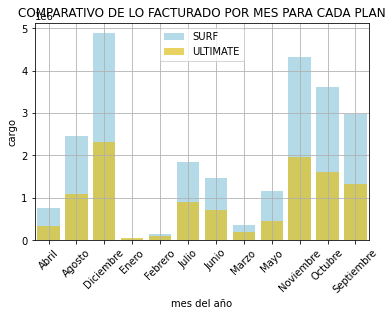

In [831]:
#usando los valores de la tabla construimos un diagrama de barras para el plan SURF
variableyS=meses_plan.reset_index()['cargo_mes_y']
variablexS = meses_plan.reset_index()['mes']
sns.barplot(x=variablexS, y=variableyS, alpha=0.7, label="SURF", color="skyblue")

#usando los valores de la tabla construimos un diagrama de barras para el plan ULTIMATE
variableyU=meses_plan.reset_index()['cargo_mes_x']
variablexU = meses_plan.reset_index()['mes']
sns.barplot(x=variablexU, y=variableyU, alpha=0.7, label="ULTIMATE", color="gold")

#desplegamos ambos planes en una gráfica y visualizamos la comparación
plt.title('COMPARATIVO DE LO FACTURADO POR MES PARA CADA PLAN')
plt.xlabel('mes del año')
plt.ylabel('cargo')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

<a id='EDA32'></a>
###  Consumos de los diferentes servicios por parte de los clientes. 

Para configurar una medición de calidad con la que los planes satisfacen las necesidades de los clientes, será necesario partir de la evidencia que nos puede proporcionar actualmente nuestra muestra de datos. Para lograrlo debemos medir el consumo de los diferentes servicios y compararlo posteriormente con una métrica que mida el desempeño de los 2 planes servicios.

In [832]:
#Busquemos los estadísticos de consumo de los datos, mensajes y llamadas 
#por mes, por medio de una tabla dinámica que agrupe el consumo de todos los usuarios

#PARA EL PLAN SURF
consumo_usu_surf = plan_surf.pivot_table(index ='mes', 
                                         values = ['duration', 'mensajes', 'volumen_datos'],
                                         aggfunc= 'sum')
consumo_usu_surf

,duration,mensajes,volumen_datos
mes,,,
Abril,17533.0,864.0,599210.15
Agosto,65799.0,4439.0,2720843.68
Diciembre,150088.0,11731.0,5766125.26
Enero,406.0,21.0,9749.72
Febrero,2673.0,108.0,109609.59
Julio,53924.0,3096.0,2030815.67
Junio,41257.0,2292.0,1484248.33
Marzo,7590.0,351.0,306945.12
Mayo,30528.0,1778.0,1073099.33


In [833]:
#vamos a mostrar la media, moda, la varianza y la desviación estándar.
consumo_usu_surf.describe()

,duration,mensajes,volumen_datos
count,12.000000,12.000000,1.200000e+01
mean,55807.750000,3883.166667,2.170515e+06
std,48753.825299,3815.656761,1.922032e+06
min,406.000000,21.000000,9.749720e+03
25%,15047.250000,735.750000,5.261439e+05
50%,47590.500000,2694.000000,1.757532e+06
75%,85135.500000,6130.750000,3.439750e+06
max,150088.000000,11731.000000,5.766125e+06


In [834]:
#PARA EL PLAN ULTIMATE
consumo_usu_ultimate = plan_ultimate.pivot_table(index ='mes', 
                                         values = ['duration', 'mensajes', 'volumen_datos'],
                                         aggfunc= 'sum')
consumo_usu_ultimate

,duration,mensajes,volumen_datos
mes,,,
Abril,7074.0,463.0,338554.75
Agosto,29922.0,2732.0,1264845.13
Diciembre,69324.0,6718.0,2766801.97
Enero,774.0,62.0,27672.37
Febrero,2822.0,139.0,119901.66
Julio,25197.0,1937.0,964339.92
Junio,17435.0,1374.0,720882.29
Marzo,3651.0,243.0,219858.22
Mayo,11781.0,931.0,482109.99


In [835]:
#vamos a mostrar la media, moda, la varianza y la desviación estándar.
consumo_usu_ultimate.describe()

,duration,mensajes,volumen_datos
count,12.000000,12.000000,1.200000e+01
mean,25827.000000,2241.500000,1.032882e+06
std,22846.433388,2149.442063,8.846217e+05
min,774.000000,62.000000,2.767237e+04
25%,6218.250000,408.000000,3.088806e+05
50%,21316.000000,1655.500000,8.426111e+05
75%,40164.000000,3489.000000,1.561289e+06
max,69324.000000,6718.000000,2.766802e+06


<a id='EDA33'></a> 
### Descripción de las distribuciones.


Tenemos una tabla de una serie de variables las cuales son 'duration', 'volumen_datos' y 'mensajes', para realizar el histograma de cada uno de ellos tenemos que tener encuenta de que se tratan de como variables aleatorias continuas como son 'duration' y 'volumen_datos'. Por otra parte 'mensajes' es denotada como una variable aleatorio discreta.

Los histogramas de frecuencia a menudo no muestran la distribución de una variable continua, ya que la frecuencia con la que los valores caen dentro de intervalos particulares es muy sensible a los límites de los intervalos. Tenemos que usar la opción de los histogramas de densidad de frecuencias.

Vamos a realizar la traza de los histogramas, usando un ciclo **for** junto con un **diccionario** para automatizar el procedimiento y acortar e código.

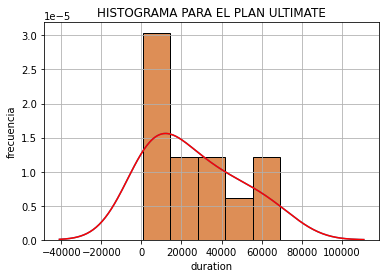

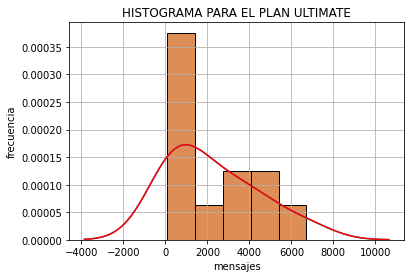

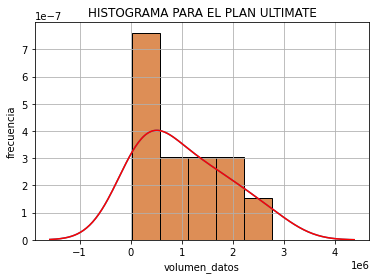

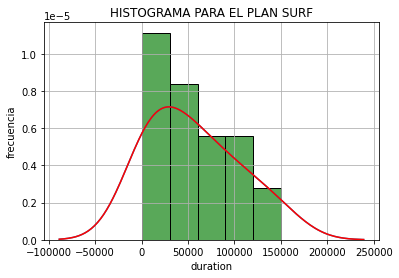

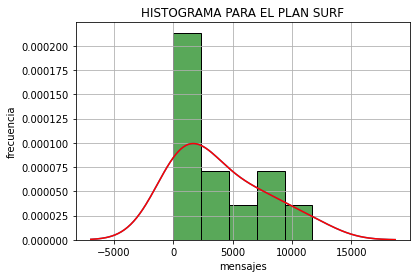

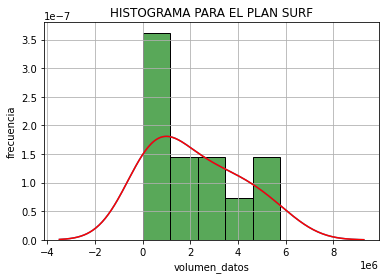

In [836]:
#podremos las listas de variables de que son las columnas de los tablas dinámicas que resumian
#las tendencias de consumo de los usuarios por mes separadas por plan de tarifas de prepago.
lista_variables =['duration', 'mensajes', 'volumen_datos']
#creamos el diccionario para identificar a cada tabla dinámica con la información que 
#lleva cada plan de tarifa de prepago
dic_plan = {'ULTIMATE': consumo_usu_ultimate, 'SURF': consumo_usu_surf}
for key_name, dict_value in dic_plan.items():
    for var in lista_variables:
        if key_name == 'ULTIMATE':
            sns.kdeplot(data=dict_value, x= var)
            sns.kdeplot(data=dict_value, x= var, color="red")
            sns.histplot(data=dict_value, x=var, stat="density", color= 'chocolate')     
            plt.title('HISTOGRAMA PARA EL PLAN ULTIMATE')
        if key_name == 'SURF':
            sns.kdeplot(data=dict_value, x= var)
            sns.kdeplot(data=dict_value, x= var, color="red")
            sns.histplot(data=dict_value, x=var, stat="density", color= 'forestgreen')
            plt.title('HISTOGRAMA PARA EL PLAN SURF')
        plt.xlabel(var) 
        plt.ylabel('frecuencia')
        plt.grid(True)
        plt.show()

La distribución de las variables se observa a una tendencia a una  distribución Gamma. Usemos dicha distribución para buscar ajustar lo más posible a la evidencia de los histogramas anteriores.

In [837]:
#definimos una función para la posterior traza de la funcion de densidad Gamma 
def gamma_density(x: List[float], alpha: float = 1, 
                  loc: float = 0, scale: float = 1) -> List[float]:
    gamma_pdfs = []
    for x_eval in x:
        pdf = gamma.pdf(x_eval, alpha, loc, scale)
        gamma_pdfs.append(pdf)
    return gamma_pdfs

Para determinar los parametros de las funciones de distribución que se ajusten lo mejor posible a los histogramas procedemos a ajustar nuevamente de forma parecida el dibujo de los histogramas con sus correspondientes funciones de distribución propuestas, finalmente ajustadas con los histogramas.

In [838]:
#creamos lista para guardar información de los ajustes de la funciones de Gamma
columnas = ['plan','variable','alfa', 'loc', 'escale']
plan_lista=[]
variable_lista=[]
alfa_lista = []
loc_lista = []
escale_lista = []

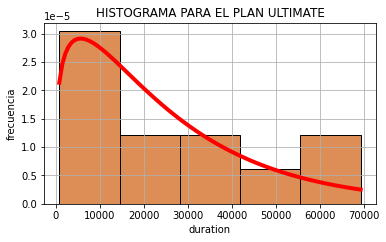

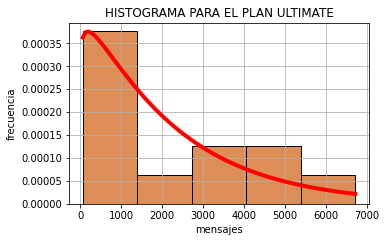

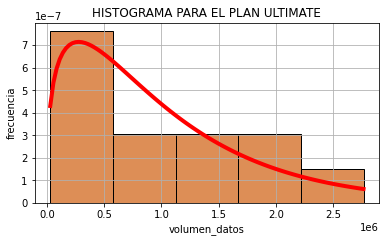

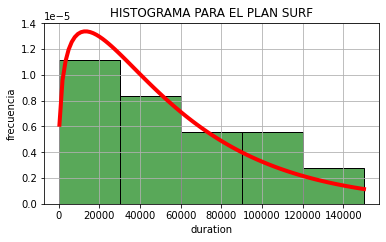

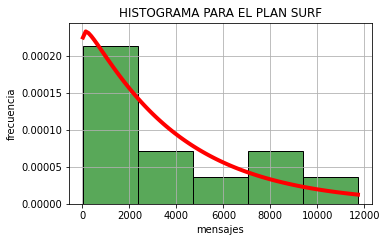

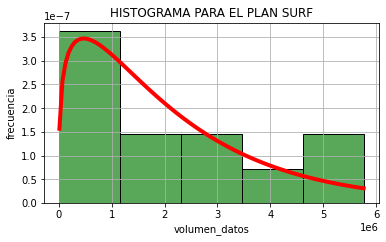

In [839]:
#para dibujar los histogramas con sus correspondientes funciones de distribución ajustadas 
#volveremos usar el mismo diccionario con el que trazamos los histogramas inicialmente.
for key_name, dict_value in dic_plan.items():
    for var in lista_variables:
#realizamos el intervalo de graficación para el eje horizontal        
        x_accel = np.linspace(dict_value[var].min(), dict_value[var].max(), 100)
#calculamos los parámetros alfa y scale de la función de distribución Gamma
        alpha_est = (dict_value[var].mean() / dict_value[var].std())**2
        scale_est = dict_value[var].var() / dict_value[var].mean()
#guardamos en una list los valores cada uno de los parámetros obtenidos
        plan_lista.append(key_name)
        variable_lista.append(var)        
        alfa_lista.append(alpha_est)
        loc_lista.append(0)
        escale_lista.append(scale_est)
# pasamos los parámetros de alfa y scale para graficar Gamma, y simplificamos haciendo loc = 0
        pdf_accel = gamma_density(x_accel, alpha=alpha_est, loc=0, scale=scale_est)
        if key_name == 'ULTIMATE':
            colorea = 'chocolate'
            tema = 'ULTIMATE'
        if key_name == 'SURF':
            colorea = 'forestgreen'
            tema = 'SURF'
        fig, ax = plt.subplots()
        x = np.linspace(-5, 5, 100)        
        sns.histplot(data=dict_value, x=var, ax=ax, stat="density", color= colorea)
        sns.lineplot(x=x_accel, y=pdf_accel, color="red", lw=4, ax=ax)
        plt.title('HISTOGRAMA PARA EL PLAN ' + tema)
        plt.xlabel(var) 
        plt.ylabel('frecuencia')
        plt.grid(True)
        fig.tight_layout(pad=3.0)        


In [840]:
#creamos un dataframe con la información de los ajustes de la funciones de distribución
ajustes_gamma_hist = pd.DataFrame(list(zip(plan_lista, variable_lista, 
                                        alfa_lista, loc_lista, 
                                        escale_lista)),  columns = columnas )   
ajustes_gamma_hist

,plan,variable,alfa,loc,escale
0,ULTIMATE,duration,1.277942,0,2.020984e+04
1,ULTIMATE,mensajes,1.087492,0,2.061165e+03
2,ULTIMATE,volumen_datos,1.363284,0,7.576428e+05
3,SURF,duration,1.310303,0,4.259149e+04
4,SURF,mensajes,1.035699,0,3.749321e+03
5,SURF,volumen_datos,1.275276,0,1.701996e+06


<a id='hypotheses'></a> 
## /to. Etapa 4. Prueba de hipótesis.


¿Cuál de los planes genera más ingresos?. Pensemos en algo conducente a responder la pregunta. ¿Los ingresos de cada plan son estadísiticamente equivalentes?. Es decir debemos probar si los ingresos promedio de cada plan tarifareo son equivalentes. Con esa estrategia podemos preguntarnos después que plan es mayor y cual es menor, si es que hay diferencia.

<a id='week1'></a> 
### Hipótesis 1:El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.


Veamos cómo se ve la distribución para los dos planes que se ofrecen por parte de la compañia. Para realizarlo antes vamos a sumar el total de cada plan en ingresos por SMS, datos, llamadas.

In [841]:
# presentemos el ingreso promedio por las llamadas , los mensajes  y los datos 
#consumidos para el plan ULTIMATE
consumo_usu_ultimate.describe()[1: 2]

,duration,mensajes,volumen_datos
mean,25827.0,2241.5,1.032882e+06


In [842]:
## presentemos el ingreso promedio por las llamadas , los mensajes  y 
#los datos consumidos para el plan SURF
consumo_usu_surf.describe()[1: 2]

,duration,mensajes,volumen_datos
mean,55807.75,3883.166667,2.170515e+06


In [843]:
#Ahora vamos a sumar el ingreso promedio global por cada plan ultimate
ingreso_promedio_ultimate = (consumo_usu_ultimate.describe()[1:2]['duration'] 
 + consumo_usu_ultimate.describe()[1:2]['mensajes'] 
 + consumo_usu_ultimate.describe()[1:2]['volumen_datos']).sum()
print('INGRESO PROMEDIO TOTAL DEL PLAN ULTIMATE:' , ingreso_promedio_ultimate)


INGRESO PROMEDIO TOTAL DEL PLAN ULTIMATE: 1060950.4816666665


In [844]:
#Ahora vamos a sumar el ingreso promedio global por cada plan surf
ingreso_promedio_surf = (consumo_usu_surf.describe()[1:2]['duration'] 
 + consumo_usu_surf.describe()[1:2]['mensajes'] 
 + consumo_usu_surf.describe()[1:2]['volumen_datos']).sum()
print('INGRESO PROMEDIO TOTAL DEL PLAN SURF: ', ingreso_promedio_surf)

INGRESO PROMEDIO TOTAL DEL PLAN SURF:  2230205.9108333327


Para visualizar la traza de los dos planes en sus distribuciones, vamos a concentrar la información de estos en un solo dataframe.

In [845]:
meses_plan= meses_plan.rename({'cargo_mes_x':'cargo_mes_Ultimate', 
                   'cargo_mes_y':'cargo_mes_Surf'}, axis = 'columns')
meses_plan

,cargo_mes_Ultimate,cargo_mes_Surf
mes,,
Abril,3.226431e+05,7.535917e+05
Agosto,1.090832e+06,2.448878e+06
Diciembre,2.320017e+06,4.883999e+06
Enero,6.144000e+04,3.072000e+04
Febrero,1.075200e+05,1.383583e+05
Julio,9.063960e+05,1.847991e+06
Junio,7.220192e+05,1.461743e+06
Marzo,1.843782e+05,3.538258e+05
Mayo,4.454614e+05,1.169342e+06


In [846]:

#realizamos un diccionario para concentrar en una columna todos los datos de la variable
#cargos de la tabla anterior
 

dic_datos_carg = { 'tipo_planes': ['surf', 'surf', 'surf', 'surf', 'surf', 'surf', 'surf', 
                                'surf', 'surf', 'surf', 'surf', 'surf', 'ultimate', 'ultimate',
                                'ultimate', 'ultimate', 'ultimate', 'ultimate', 'ultimate', 'ultimate', 
                                'ultimate', 'ultimate', 'ultimate', 'ultimate'],
                   'cargos': [7.535917e+05, 2.448878e+06, 4.883999e+06, 3.072000e+04,
                              1.383583e+05, 1.847991e+06, 1.461743e+06, 3.538258e+05, 
                              1.169342e+06, 4.326143e+06, 3.604194e+06, 2.971314e+06, 
                              3.226431e+05 ,1.090832e+06 ,2.320017e+06 ,6.144000e+04,
                              1.075200e+05 ,9.063960e+05 ,7.220192e+05 ,1.843782e+05,
                              4.454614e+05 ,1.951011e+06 ,1.613117e+06 ,1.321183e+06 ]
                 }
# creamos un dataframe para trazar las distribuciones de los dos planes tarifarios
hipotesis1_data = pd.DataFrame(dic_datos_carg)
hipotesis1_data

,tipo_planes,cargos
0,surf,753591.7
1,surf,2448878.0
2,surf,4883999.0
3,surf,30720.0
4,surf,138358.3
5,surf,1847991.0
6,surf,1461743.0
7,surf,353825.8
8,surf,1169342.0
9,surf,4326143.0


Ahora con estos datos grafiquemos la densidad de probabilidad de la tabla anterior separando  los cargos mensuales por plan tarifario.

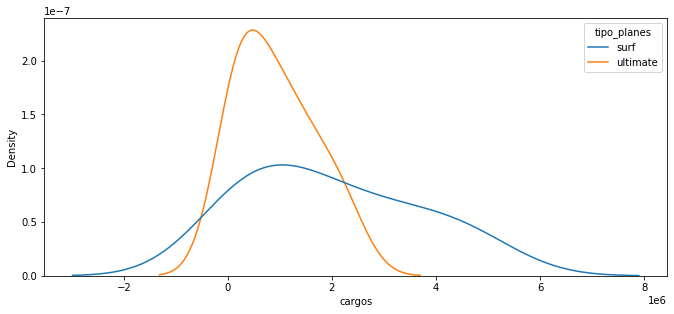

In [847]:
#declaramos un objeto fig para dibujar en el mismo plano ambas distribuciones
#para el plan ULTIMATE en azul y para el plan SURF en naranja
fig, ax = plt.subplots(figsize=(10, 5))
#creamos los graficos de densidad para la tabla anterior
sns.kdeplot(data=hipotesis1_data, x="cargos", 
            hue="tipo_planes", alpha=0.5, ax=ax)
#, title = 'GRAFICOS DE LOS PLANES TARIFARIOS'
fig.tight_layout(pad=3.0)

Los datos trazados confirman una igualdad en los ingresos promedio de los dos planes tarifarios. Aunque solo son 12 datos por plan, para tener un uso adecuado del valor alpha 0.05  para la prueba de hipotesís, será necesario aumentar el número de datos usemos los datos sin la agrupación por mes para observar con mas seguridad la tendencia que se esta observando en la gráfica anterior.

In [848]:
h1.fillna(0, inplace=True)
h1['cargo'] = h1['volumen_datos'] + h1['duration'] + h1['mensajes'] 
h1

,user_id,plan,mes,volumen_datos,duration,llamadas,mensajes,cargo
0,1000,ultimate,Diciembre,1901.47,124.0,16.0,11.0,2036.47
1,1001,surf,Agosto,6919.15,182.0,27.0,30.0,7131.15
2,1001,surf,Diciembre,19369.18,412.0,56.0,44.0,19825.18
3,1001,surf,Noviembre,18504.30,426.0,64.0,36.0,18966.30
4,1001,surf,Octubre,22330.49,393.0,65.0,53.0,22776.49
...,...,...,...,...,...,...,...,...
2272,1498,surf,Septiembre,22827.28,363.0,45.0,0.0,23190.28
2273,1499,surf,Diciembre,22059.21,496.0,65.0,0.0,22555.21
2274,1499,surf,Noviembre,16813.83,308.0,45.0,0.0,17121.83
2275,1499,surf,Octubre,19492.43,385.0,53.0,0.0,19877.43


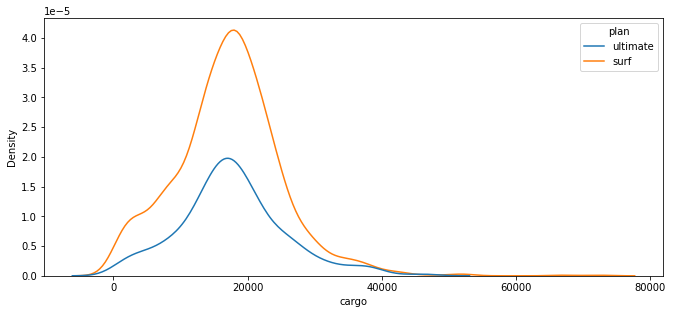

In [849]:
#declaramos un objeto fig para dibujar en el mismo plano ambas distribuciones
#para el plan ULTIMATE en azul y para el plan SURF en naranja
fig, ax = plt.subplots(figsize=(10, 5))
#creamos los graficos de densidad para la tabla anterior
sns.kdeplot(data=h1, x="cargo", 
            hue="plan", alpha=0.5, ax=ax)
#, title = 'GRAFICOS DE LOS PLANES TARIFARIOS'
fig.tight_layout(pad=3.0)

Por lo que podemos ver, para los dos planes la media parece estar muy coincidente. Aunque ¿Lo será esta diferencia que vemos estadísticamente significativa?. 

Realicemos una prueba de hipótesis para contestar a esta pregunta. Usemos la notación $\mu_{\text{surf}}$ para denotar el ingreso promedio del plan SURF y $\mu_{\text{ultimate}}$ para denotar el ingreso promedio para el plan ULTIMATE.

1. Nuestras hipótesis a plantear serán:

$H_0: \mu_{\text{surf}} = \mu_{\text{ultimate}}$

$H_a: \mu_{\text{surf}} \neq \mu_{\text{ultimate}}$

2. Establezcamos un nivel de significancia del 5%.

3. Seleccionemos un estadístico de prueba.

Para que sea confiable el uso del estadístico debemos obtener una muestra de mas datos, la teoría nos dice de al menos 30 valores. Vamos a usar los datos de los ingresos de cada usuario por mes; en lugar de usar solo los datos concentrados del ingreso por mes. Se obtendrán 2277 datos.

Si en el apartado **3.3 Descripción de las distribuciones** asumimos que la distribución de la variable "ingreso promedio" es del tipo Gamma, entonces deberiamos escoger un estadístico basado en la distribución Gamma; más sin embargo la gráfica anterior nos muestra una tendencia de las funciones de distribución a comportarse como distribuciones del tipo Normal.

Teniendo eso en consideración, se propone entonces escoger un estadístico basado en la distribución normal.

Escogamos

$$t = \frac{(\hat{\text{vg}}-\hat{\text{vc}}) - (\mu_{\text{vg}} - \mu_{\text{vc}})}{\sqrt{\frac{s_{\text{vg}}^2}{n} + \frac{s_{\text{vc}}^2}{m}}}$$

Por transformaciones de variables aleatorias, sabemos que esto se distribuye como una t-student con $(n+m-2)$ grados de libertad.

Si asumimos que la hipótesis nula es cierta, entonces nuestro estadístico toma la siguiente forma:

$$t = \frac{\hat{\text{vg}}-\hat{\text{vc}}}{\sqrt{\frac{s_{\text{vg}}^2}{n} + \frac{s_{\text{vc}}^2}{m}}}$$


In [850]:
#realizamos la selección de las dos muestras a comparar
sample_surf = h1.loc[h1['plan'] == 'surf', 'cargo']
sample_ultimate = h1.loc[h1['plan'] == 'ultimate', 'cargo']

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = st.ttest_ind(sample_surf, sample_ultimate)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value:  0.13982150876895155
No rechazamos la hipótesis nula


Verfiquemos si se soporto con los datos aportados por la agrupación de los ingreso por mes de acumulación.

In [851]:
#aqui se compara las dos muestras en donde se denotan los ingresos por mes para cada 
#plan tarifareo
sample_s = hipotesis1_data.loc[hipotesis1_data['tipo_planes']== 'surf']['cargos']
sample_u = hipotesis1_data.loc[hipotesis1_data['tipo_planes']== 'ultimate']['cargos']

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = st.ttest_ind(sample_s, sample_u)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value:  0.05176920805219678
No rechazamos la hipótesis nula


<a id='week'></a> 
### Hipótesis 2:El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

Para determinar si el nivel de ingresos es consecuencia de la región, hagamos una prueba con el estado de Nueva York-Nueva Jersey que es una de las de mas alto poder adquisitivo, veamos si los clientes son mas propenso a consumir mas servicios fuera de los planes tarifarios.
Para este fin, vamos a realizar un inserción de los datos de los usuarios que estan descritos en la tabla de 'usuarios', mediante la columna ''.

In [852]:
#preparamos el dataframe que aportará los datos para una prueba de hipotesís
#New York-Newark-Jersey City, NY-NJ-PA MSA
#city
h2 = usuarios.merge(h1, on = 'user_id', how='right')
h2 = h2.drop(columns=["first_name", 'last_name', 'age', 
                      'reg_date', 'plan_x', 'churn_date'])
h2[['user_id', 'city', 'plan_y', 'mes', 'cargo']]


,user_id,city,plan_y,mes,cargo
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,Diciembre,2036.47
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,Agosto,7131.15
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,Diciembre,19825.18
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,Noviembre,18966.30
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,Octubre,22776.49
...,...,...,...,...,...
2272,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,Septiembre,23190.28
2273,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,Diciembre,22555.21
2274,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,Noviembre,17121.83
2275,1499,"Orlando-Kissimmee-Sanford, FL MSA",surf,Octubre,19877.43


Ahora antes realizar el planteamiento formal de la hipotesís, vamos a trazar los datos del dataframe anterior.
Se mostrarán los datos de la subdivisión de los usuarios de la región de Nueva York, frente a los de las demás regiones.

In [853]:
#Hacemos un filtro para los de la region de NY
#Declaramos un filtro para el resto de las regiones
h2.loc[h2['city'] != "New York-Newark-Jersey City, NY-NJ-PA MSA", 'city']  = 'otras regiones'
h2.loc[h2['city'] == "New York-Newark-Jersey City, NY-NJ-PA MSA", 'city']  = 'New York-Newark-Jersey'


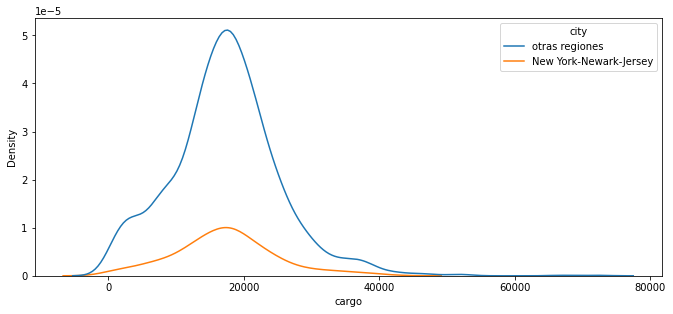

In [854]:
#declaramos un objeto fig para dibujar en el mismo plano ambas distribuciones
#para el región de NY  en naranja y para el resto de regiones,en azul 
fig, ax = plt.subplots(figsize=(10, 5))
#creamos los graficos de densidad para la tabla anterior
sns.kdeplot(data=h2, x="cargo", 
            hue="city", alpha=0.5, ax=ax)
#, title = 'GRAFICOS DE LOS PLANES TARIFARIOS'
fig.tight_layout(pad=3.0)

Un primer juicio, nos induce a pensar que las personas de la región de Nueva York son la que tendrían la pontencialidad de revazar su plan tarifario, debido a que su nivel de ingreso, les permite tener ese tipo de omisiones.¿Existe evidencia de que en la mencionada región los usuarios aportan un ingreso mayor?. Por la gráfica anterior nos hace concluir que los ingresos son idénticos.

Realicemos una prueba de hipótesis para contestar a esta pregunta. Usemos la notación $\mu_{\text{NY}}$ para denotar el ingreso promedio del la región de Nueva York y $\mu_{\text{resto}}$ para denotar el ingreso promedio para las restantes regiones.

1. Nuestras hipótesis a plantear serán:

$H_0: \mu_{\text{NY}} = \mu_{\text{resto}}$

$H_a: \mu_{\text{NY}} \neq \mu_{\text{resto}}$

2. Establezcamos un nivel de significancia del 5%.

3. Seleccionemos un estadístico de prueba.

De manera análoga al planteamiento anterior las distribuciones muestran una configuración semejante a las distribuciones de tipo Normal. Por lo cual el estadístico de prueba deberá ser también del tipo t-student.


In [855]:
sample_NY    = h2.loc[h2['city'] == 'New York-Newark-Jersey', 'cargo']
sample_resto = h2.loc[h2['city'] == 'otras regiones', 'cargo'] 

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = st.ttest_ind(sample_NY, sample_resto)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value:  0.9453109167436925
No rechazamos la hipótesis nula


<a id='end'></a> 
## /to. Conclusiones.

1. El ingreso promedio no difiere para los planes tarifareos SURF y ULTIMATE.
2. El ingreso promedio de la región de Nueva York, no difiere al de otras regiones.
3. Los planes tarifareos no presentan ninguna evidencia de que uno sea mas atractivo para obtener ingresos.`
4. El número de servicios como se ve reflejado en los histogramas de los apartados **2.1, 2.2 y 2.3** aumenta al final del año.`
4. La tarifa SURF aporta la mayor parte de los ingresos esto es debido a su mayor número de usuarios como se evidencia en el apartado **2.9**.
<a id='indice132'></a>

<a id='R6'></a> 
## /to. Recomendaciones. 
- `Se recomienda favorecer la campaña para el plan ULTIMATE, con objeto de aumentar su volumen de usuarios, esto en estrategia de que el plan SURF, tiene mayor número de usuarios, sin embargo los ingresos promedios de ambos planes muestran evidencia de ser los mismos.`
- `Sería importante que se diseñara un servicio en especifico para los fines de año, y buscar captar el interes de los usuarios en incrementar el uso de los servicios en esas fechas.`
- `Las campañas de publicidad de la compañia no deven focalizarse en la region de Nueva York, pués en los datos no hay evidencia que el ingreso sea significativo.`


[Volver a Contenidos](#back)